In [1]:

import pickle
import matplotlib.pyplot as plt
import numpy as np

from handy import AWSChannel
import matplotlib as mpl

In [9]:
atmospheric_scenario = "midlatitude-winter"
cloud_height = 6e3
swp = 0.5

with open(f"../../../../PHD/Projects/Cloud_Filtering/data/arts_surface_simulations_tropical_allsky_6000.0_0.5.pkl", "rb") as f:
    simulation_vars, results = pickle.load(f)

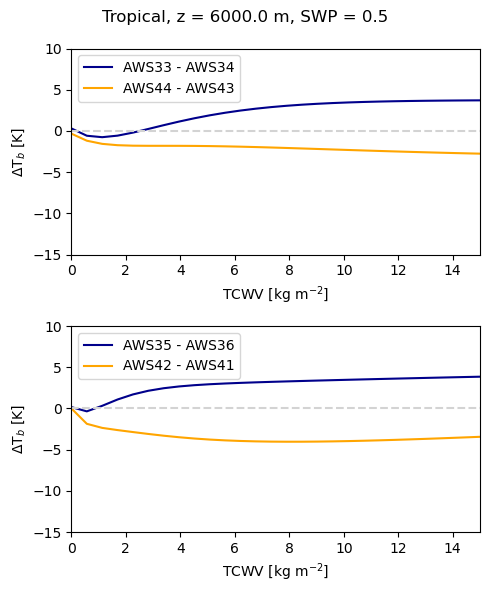

In [10]:
#cloud_height = simulation_vars["cloud_height"]
#swp = simulation_vars["swp"]

fig, axes = plt.subplots(2, 1, figsize=(5, 6))

dTb_33_34 = results["AWS33"]["Tb"] - results["AWS34"]["Tb"]
dTb_44_43 = results["AWS44"]["Tb"] - results["AWS43"]["Tb"]

axes[0].plot(
        results["AWS33"]["h2o_column"], dTb_33_34, c="darkblue", label="AWS33 - AWS34"
)
axes[0].plot(
    results["AWS44"]["h2o_column"], dTb_44_43, c="orange", label="AWS44 - AWS43"
)

dTb_35_36 = results["AWS35"]["Tb"] - results["AWS36"]["Tb"]
dTb_42_41 = results["AWS42"]["Tb"] - results["AWS41"]["Tb"]

axes[1].plot(
    results["AWS35"]["h2o_column"], dTb_35_36, c="darkblue", label="AWS35 - AWS36"
)
axes[1].plot(
    results["AWS42"]["h2o_column"], dTb_42_41, c="orange", label="AWS42 - AWS41"
)

for ax in axes:
    ax.axhline(0, ls="--", c="lightgrey")

    ax.set_xlim([0, 15])
    ax.set_ylim([-15, 10])

    ax.set_ylabel(r"$\Delta$T$_{b}$ [K]")
    ax.set_xlabel(r"TCWV [kg m$^{-2}$]")

    ax.legend()

atmospheric_scenario = simulation_vars["atmospheric_scenario"]
surface_T = simulation_vars["surface_T"]
reflectivity = simulation_vars["reflectivity"]

fig.suptitle(
    f'{atmospheric_scenario.replace("-", " ").title()}, z = {cloud_height} m, SWP = {swp}',
)

fig.tight_layout()

AWS31
AWS32
AWS33
AWS34
AWS35
AWS36
AWS41
AWS42
AWS43
AWS44


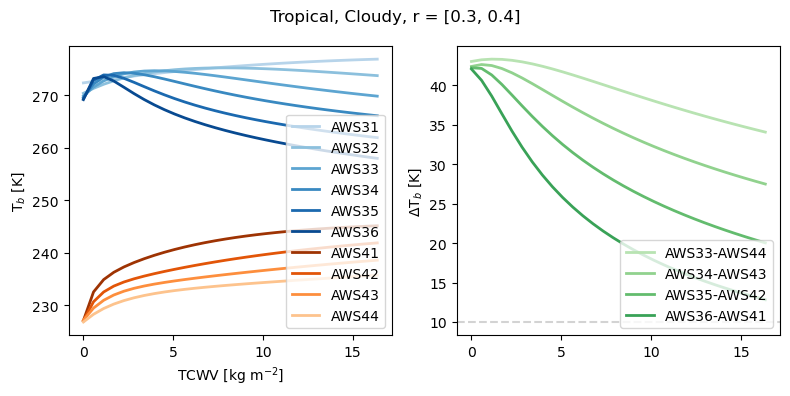

In [11]:
#cloud_height = simulation_vars["cloud_height"]
#swp = simulation_vars["swp"]

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 4))

blues = plt.cm.Blues(np.linspace(0.3, 0.9, 6))
oranges = plt.cm.Oranges(np.linspace(0.9, 0.3, 4))
colors = np.vstack([blues, oranges])
greens = plt.cm.Greens(np.linspace(0.3, 0.9, 6))

for i, (ch, result) in enumerate(results.items()):
    print(ch)
    ax.plot(result["h2o_column"], result["Tb"], label=ch, color=colors[i], lw=2)

ax.set_ylabel(r"T$_{b}$ [K]")
ax.set_xlabel(r"TCWV [kg m$^{-2}$]")

atmospheric_scenario = simulation_vars["atmospheric_scenario"]
surface_T = simulation_vars["surface_T"]
reflectivity = simulation_vars["reflectivity"]

ch_group3 = ["AWS33", "AWS34", "AWS35", "AWS36"]
ch_group4 = ["AWS44", "AWS43", "AWS42", "AWS41"]

for i, ch_3 in enumerate(ch_group3):
    tb_3 = results[ch_3]["Tb"]
    tb_4 = results[ch_group4[i]]["Tb"]
    
    ax2.plot(result["h2o_column"], tb_3-tb_4, label=f"{ch_3}-{ch_group4[i]}", color=greens[i], lw=2)

ax2.set_ylabel(r"$\Delta$T$_{b}$ [K]")

ax2.axhline(10, ls="--", c="lightgrey")

"""
ax3.plot(result["h2o_column"], results["AWS33"]["Tb"] - results["AWS34"]["Tb"])
ax3.set_xlim([0, 5])
ax3.axhline(-1, ls="--", color="lightgrey")
"""

fig.suptitle(
    #f'{atmospheric_scenario.replace("-", " ").title()}, z = {cloud_height} m, SWP = {swp}'
    f'{atmospheric_scenario.replace("-", " ").title()}, Cloudy, r = [0.3, 0.4]'
)

ax.legend(loc="lower right")
ax2.legend(loc="lower right")
fig.tight_layout()


plt.savefig(
        f"../../../../PHD/Projects/Cloud_Filtering/figures/ARTS_simulations/Tb_difference_subarctic-winter_cloudy_larger_r.png",
        facecolor="white",
        bbox_inches="tight",
        pad_inches=0.1,
        dpi=200,
    )

AWS31
AWS32
AWS33
AWS34
AWS35
AWS36
AWS41
AWS42
AWS43
AWS44


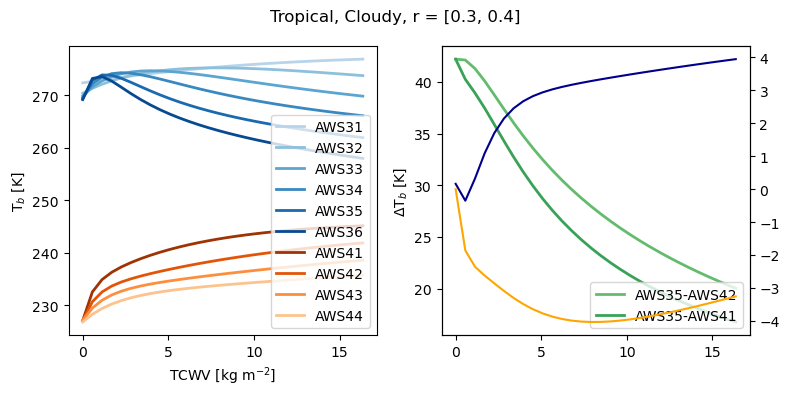

In [12]:
#cloud_height = simulation_vars["cloud_height"]
#swp = simulation_vars["swp"]

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 4))

blues = plt.cm.Blues(np.linspace(0.3, 0.9, 6))
oranges = plt.cm.Oranges(np.linspace(0.9, 0.3, 4))
colors = np.vstack([blues, oranges])
greens = plt.cm.Greens(np.linspace(0.3, 0.9, 6))

for i, (ch, result) in enumerate(results.items()):
    print(ch)
    ax.plot(result["h2o_column"], result["Tb"], label=ch, color=colors[i], lw=2)

ax.set_ylabel(r"T$_{b}$ [K]")
ax.set_xlabel(r"TCWV [kg m$^{-2}$]")

atmospheric_scenario = simulation_vars["atmospheric_scenario"]
surface_T = simulation_vars["surface_T"]
reflectivity = simulation_vars["reflectivity"]

ch_group3 = ["AWS33", "AWS34", "AWS35", "AWS36"]
ch_group4 = ["AWS44", "AWS43", "AWS42", "AWS41"]

for i, ch_3 in enumerate(ch_group3):
    tb_3 = results["AWS35"]["Tb"]
    tb_4 = results[ch_group4[i]]["Tb"]

    if ch_group4[i] == "AWS44":
        continue
    if ch_group4[i] == "AWS43":
        continue
    
    ax2.plot(result["h2o_column"], tb_3-tb_4, label=f"AWS35-{ch_group4[i]}", color=greens[i], lw=2)

ax2.set_ylabel(r"$\Delta$T$_{b}$ [K]")

#ax2.axhline(10, ls="--", c="lightgrey")

ax2_twin = ax2.twinx()
ax2_twin.plot(
    results["AWS35"]["h2o_column"], dTb_35_36, c="darkblue", label="AWS35 - AWS36"
)
ax2_twin.plot(
    results["AWS42"]["h2o_column"], dTb_42_41, c="orange", label="AWS42 - AWS41"
)

"""
ax3.plot(result["h2o_column"], results["AWS33"]["Tb"] - results["AWS34"]["Tb"])
ax3.set_xlim([0, 5])
ax3.axhline(-1, ls="--", color="lightgrey")
"""

fig.suptitle(
    #f'{atmospheric_scenario.replace("-", " ").title()}, z = {cloud_height} m, SWP = {swp}'
    f'{atmospheric_scenario.replace("-", " ").title()}, Cloudy, r = [0.3, 0.4]'
)

ax.legend(loc="lower right")
ax2.legend(loc="lower right")
fig.tight_layout()

plt.savefig(
        f"../../../../PHD/Projects/Cloud_Filtering/figures/ARTS_simulations/Tb_difference_aws35_subarctic-winter_clearsky_larger_r.png",
        facecolor="white",
        bbox_inches="tight",
        pad_inches=0.1,
        dpi=200,
    )